In [30]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [31]:
original =pd.read_csv('dataset-2.csv')
df=original.copy()

/var/folders/32/01d39x_s1sn9ywcywln8d29r0000gn/T/ipykernel_96134/734992450.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  original =pd.read_csv('dataset-2.csv')


In [32]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [33]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

## Data Preprocessing

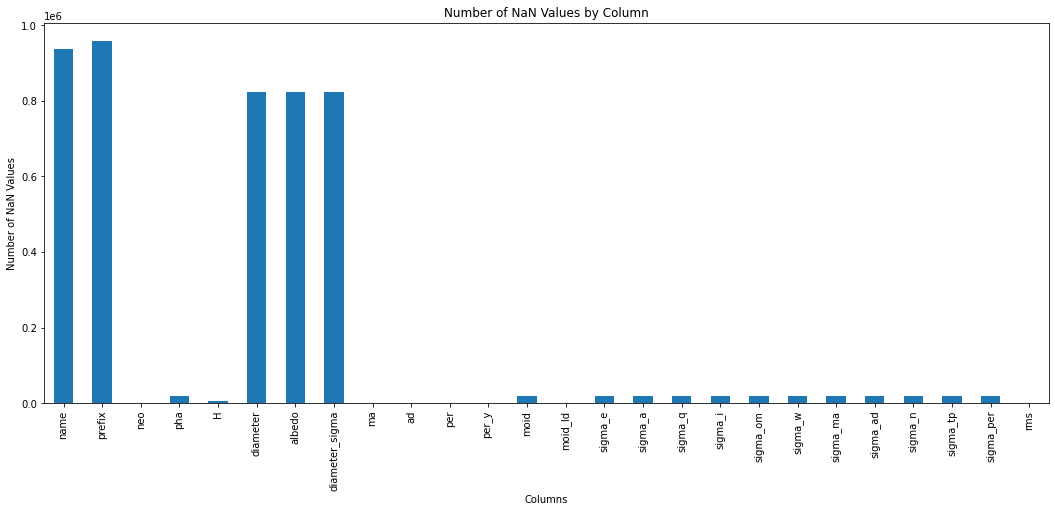

In [35]:
nan_counts = df.isnull().sum()

# filter the nan_counts Series to include only columns with non-zero NaN counts
nan_counts_filtered = nan_counts[nan_counts > 0]

# create a bar chart of the filtered NaN counts
plt.figure(figsize=(18, 7))
nan_counts_filtered.plot(kind='bar')
plt.title('Number of NaN Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.show()


In [36]:
# Columns with missing values in Perentage
missing_cols = df.isna().mean() * 100
missing_cols = missing_cols[missing_cols > 0]
print("Percentage of missing values:\n", missing_cols)

Percentage of missing values:
 name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
ma                 0.000104
ad                 0.000417
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2.078404
sigma_om           2.078404
sigma_w            2.078404
sigma_ma           2.078404
sigma_ad           2.078821
sigma_n            2.078404
sigma_tp           2.078404
sigma_per          2.078821
rms                0.000209
dtype: float64


 1.  97% of the **name** column is null. Since the **full_name** column includes **pdes** and **name** and no null in this column, pdes and name columns could be removed.
 
 2. prefix refers to asteroid prefix and 99.9% of this column is null. It could be removed because it does not contribute on EDA or modeling.
 
3. About 86% null in each **diameter, albedo, and diameter_sigma** column. These attributes descripe the size of asteriod, and **H**, which refer to absolute magnitude parameter, could descripe the size of asteriod too. Additional, values in these three columns are specific to each unique asteroid, and replacing mean or median will lead to inaccurate subsequent analysis and model construction. Thus, removing **diameter, albedo, and diameter_sigma** column.
 
4. For Columns which has around 2% missing values, we/ are gonna fill them with Random Sample Imputation


In [37]:
# Columns Dropped
df=df.drop(labels=['prefix','name','diameter','albedo','diameter_sigma','H', 'pdes'], axis=1)

# Random Sample Imputation
def imputer_New(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            random_sample = df[col].dropna().sample(df[col].isnull().sum(),
                                                    random_state=69, replace=True)
            random_sample.index = df[df[col].isnull()].index
            df.loc[df[col].isnull(), col] = random_sample
    return df


imputer_New(df)

,id,spkid,full_name,neo,pha,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,N,N,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,N,N,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,N,N,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,N,N,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,N,N,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),N,N,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),N,N,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),Y,Y,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),N,N,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [38]:
# Converting pha into 0 and 1, Since Ml Algorithms work much better on Numerical Values, 0 would be indicating that the asteroid is not harmful and 1 would indicate it is harmful
# df['pha'] = df['pha'].map({

#     'N': 0,
#     'Y': '1'
# })
# df['neo'] = df['neo'].map({
#     'N':0,
#     'Y':'1'

# })

# # Converting Object to String
# df['pha'] = df['pha'].astype(int)
# df['spkid'] = df['spkid'].astype(int)
# df['neo'] = df['neo'].astype(int)

# Segregating Categorical and Numerical Columns
df_categorical = df.select_dtypes(include='object')
df_numerical=df.select_dtypes(include='number')


## Expolatory Data Analysis

In [39]:
pd.set_option('display.max_columns', None)
df_numerical.head()

,spkid,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,2000001,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301
1,2000002,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936
2,2000003,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848
3,2000004,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980
4,2000005,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191


In [40]:
df_categorical.head()

,id,full_name,neo,pha,orbit_id,equinox,class
0,a0000001,1 Ceres,N,N,JPL 47,J2000,MBA
1,a0000002,2 Pallas,N,N,JPL 37,J2000,MBA
2,a0000003,3 Juno,N,N,JPL 112,J2000,MBA
3,a0000004,4 Vesta,N,N,JPL 35,J2000,MBA
4,a0000005,5 Astraea,N,N,JPL 114,J2000,MBA


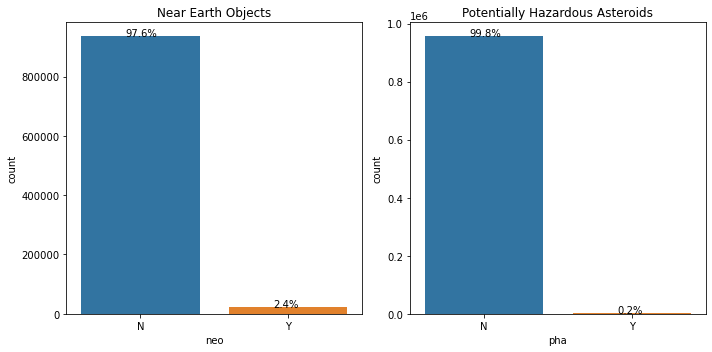

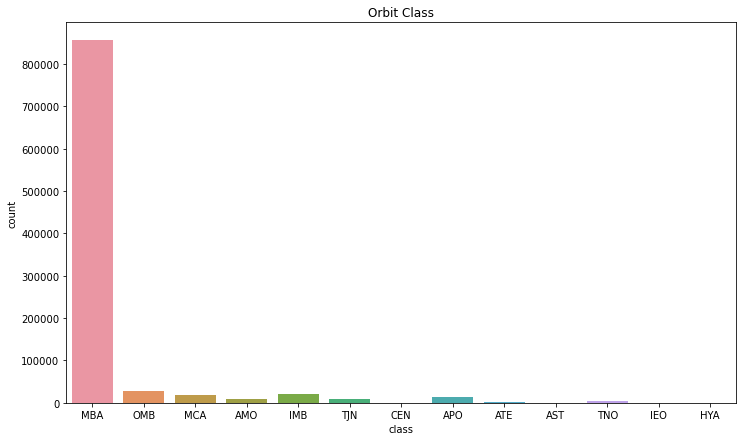

In [41]:
# Figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

#  Count plot of the "neo" variable on the left subplot
sns.countplot(x='neo', data=df, ax=axs[0])
axs[0].set_title('Near Earth Objects')

# Add percentage labels to the left subplot
total = float(len(df.neo))
for p in axs[0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    axs[0].annotate(percentage, (x, y))

#  Count plot of the "pha" variable on the right subplot
sns.countplot(x='pha', data=df, ax=axs[1])
axs[1].set_title('Potentially Hazardous Asteroids')

# Add percentage labels to the right subplot
total = float(len(df.pha))
for p in axs[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 3
    axs[1].annotate(percentage, (x, y))

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

# Count plot for Orbit Class
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(x='class', data=df, ax=ax)
plt.title('Orbit Class')


plt.show()


- The dataset is highly unbalanced, 2.4% are **Near Earth Objects** and out of those only **0.2%** are Hazaerdous Asteriods

-  Out of 12 Orbit classes most of the orbit class is  of  **MBA** , which is around **89%.**

## Data Preprocessing

In [42]:
# Removing Identifying Columns
from sklearn.calibration import LabelEncoder


df = df.drop(labels=['id', 'spkid', 'full_name', 'orbit_id',
             'equinox'], axis=1).reset_index(drop=True)

# Encode categorical features and target
one_hot_encoded_data = pd.get_dummies(data, columns=['neo', 'class'])
one_hot_encoded_data['pha'] = LabelEncoder().fit_transform(one_hot_encoded_data['pha'])


NameError: name 'data' is not defined

In [ ]:
one_hot_encoded_data.head()

,neo,pha,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,0,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958524 non-null  int64  
 1   pha        958524 non-null  int64  
 2   epoch      958524 non-null  float64
 3   epoch_mjd  958524 non-null  int64  
 4   epoch_cal  958524 non-null  float64
 5   e          958524 non-null  float64
 6   a          958524 non-null  float64
 7   q          958524 non-null  float64
 8   i          958524 non-null  float64
 9   om         958524 non-null  float64
 10  w          958524 non-null  float64
 11  ma         958524 non-null  float64
 12  ad         958524 non-null  float64
 13  n          958524 non-null  float64
 14  tp         958524 non-null  float64
 15  tp_cal     958524 non-null  float64
 16  per        958524 non-null  float64
 17  per_y      958524 non-null  float64
 18  moid       958524 non-null  float64
 19  moid_ld    958524 non-n

In [ ]:
from sklearn.model_selection import train_test_split

# Split train, validation, and test sets
x = one_hot_encoded_data.drop('pha', axis=1)
y = one_hot_encoded_data['pha'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100, stratify=y)

print("Shape of original dataset :", one_hot_encoded_data.shape)
print("Shape of x_train set", x_train.shape)
print("Shape of y_train set", y_train.shape)

print("Shape of x_test set", x_test.shape)
print("Shape of y_test set", y_test.shape)


Shape of original dataset : (958524, 45)
Shape of x_train set (766819, 44)
Shape of y_train set (766819, 1)
Shape of x_test set (191705, 44)
Shape of y_test set (191705, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing the features
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
# Normalizing after splitting could prevent leaking information about the validation set into the train set
# StandardScaler() is useful in classification and Normalizer() is useful in regression


In [ ]:
# Imbalance in target variable
y_train.value_counts()


pha
0      765139
1        1680
dtype: int64

### Fixed the Imbalancing of the dataset with SMOTE and RandomUnderSampler

In [ ]:
from imblearn.over_sampling import SMOTE

# Data Upsampling - SMOTE
x_train_us, y_train_us = SMOTE(
    sampling_strategy=0.5, random_state=100).fit_resample(x_train, y_train)
y_train_us.value_counts()


pha
0      765139
1      382569
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Data Undersampling - Random Undersampling
random_under_sampling = RandomUnderSampler(random_state=100)
x_train_us_rus, y_train_us_rus = random_under_sampling.fit_resample(x_train_us, y_train_us)

y_train_us_rus.value_counts()


pha
0      382569
1      382569
dtype: int64

#### Predictions


## RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Create an instance of the Random Forest Classifier algorithm
rfc = RandomForestClassifier()

# Train the model on the training set
rfc.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(x_test)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and f1 score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

/var/folders/32/01d39x_s1sn9ywcywln8d29r0000gn/T/ipykernel_96134/1937113598.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Precision: 0.25
Recall: 0.66
F1 score: 0.37
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191285
           1       0.25      0.66      0.37       420

    accuracy                           1.00    191705
   macro avg       0.63      0.83      0.68    191705
weighted avg       1.00      1.00      1.00    191705



## Logistic Regression

In [43]:
# Create an instance of the Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(penalty='none', tol=10**-20, C=20, solver='newton-cg',
                        max_iter=50, class_weight='balanced', random_state=100)

# Train the model on the training set
lr.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(x_test)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and f1 score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


/Users/kavach/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/kavach/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kavach/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kavach/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Precision: 0.09
Recall: 0.98
F1 score: 0.16
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    191285
           1       0.09      0.98      0.16       420

    accuracy                           0.98    191705
   macro avg       0.54      0.98      0.58    191705
weighted avg       1.00      0.98      0.99    191705



In [44]:
from xgboost import XGBClassifier


xgbc = XGBClassifier(max_depth=10, learning_rate=0.1,
                     n_estimators=1000, eval_metric='mlogloss', random_state=100)

# Train the model on the training set
xgbc.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = xgbc.predict(x_test)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and f1 score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))
